<a href="https://colab.research.google.com/github/pswoo0323/2023.AI/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_us.txt', names=['size', 'price'])
print(data)

X = data['size']
y = data['price']
m = len(data)



Mounted at /content/drive
      size   price
2104     3  399900
1600     3  329900
2400     3  369000
1416     2  232000
3000     4  539900
1985     4  299900
1534     3  314900
1427     3  198999
1380     3  212000
1494     3  242500
1940     4  239999
2000     3  347000
1890     3  329999
4478     5  699900
1268     3  259900
2300     4  449900
1320     2  299900
1236     3  199900
2609     4  499998
3031     4  599000
1767     3  252900
1888     2  255000
1604     3  242900
1962     4  259900
3890     3  573900
1100     3  249900
1458     3  464500
2526     3  469000
2200     3  475000
2637     3  299900
1839     2  349900
1000     1  169900
2040     4  314900
3137     3  579900
1811     4  285900
1437     3  249900
1239     3  229900
2132     4  345000
4215     4  549000
2162     4  287000
1664     2  368500
2238     3  329900
2567     4  314000
1200     3  299000
852      2  179900
1852     4  299900
1203     3  239500


In [12]:

X = (np.array(X)).reshape(m, 1)
y = (np.array(y)).reshape(m, 1)
print(X.shape, y.shape)


(47, 1) (47, 1)


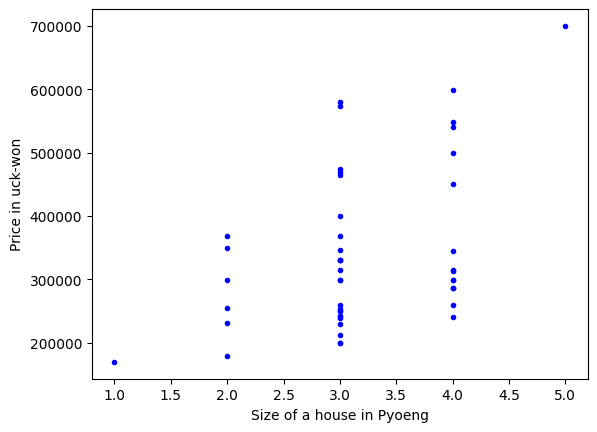

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(X,y,'b.')
plt.xlabel("Size of a house in Pyoeng")
plt.ylabel("Price in uck-won")
plt.show()

Optimized Parameters: [[10942.00777689]
 [35899.7254736 ]]


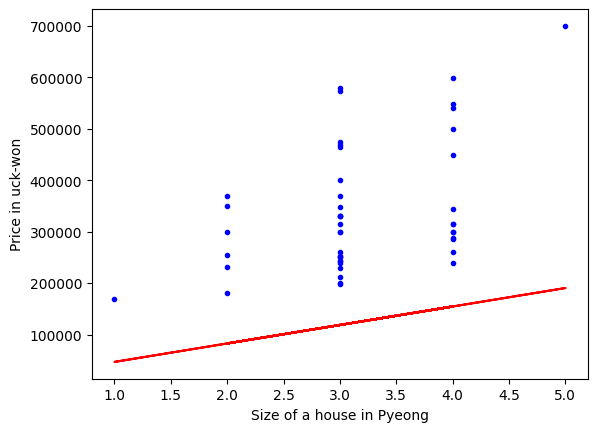

In [15]:
X_b = np.c_[np.ones((m, 1)), X]

learning_rate = 0.0001
max_iter = 200
theta = np.zeros((2, 1))
gradients = np.zeros((2, 1))

for i in range(max_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print("Optimized Parameters:", theta)

plt.plot(X, y, 'b.')
plt.plot(X, X_b.dot(theta), 'r')
plt.xlabel("Size of a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

In [17]:
X_new = np.array([[10], [90]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta)
print ("10평과 90평 집의 예측 가격")
print ( y_predict)

10평과 90평 집의 예측 가격
[[ 369939.26251293]
 [3241917.30040128]]


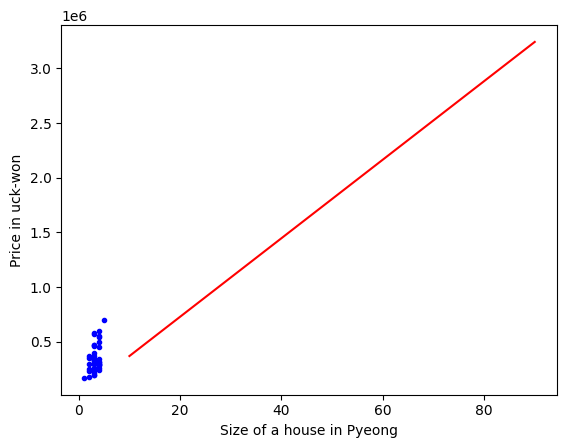

In [18]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.xlabel("Size of a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

In [19]:
X_mine = np.array([[25]])
X_mine_b = np.c_[np.ones((1,1)), X_mine]
y_predict = X_mine_b.dot(theta)
print (y_predict,"억원")

[[908435.144617]] 억원


In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, penalty = None, eta0=0.0001)
sgd_reg.fit(X,y.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100, penalty=None)

theta:
[17254.51686107] [56387.64088599]


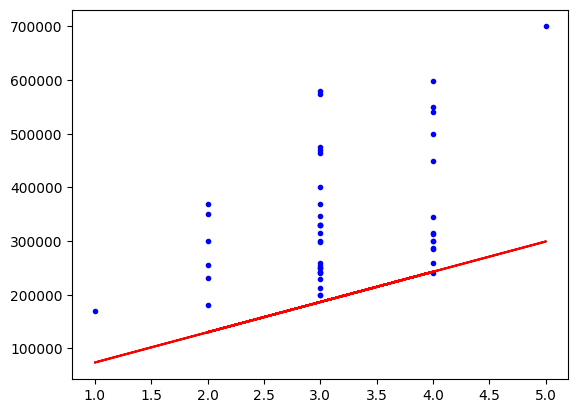

In [22]:
print ("theta:")
print (sgd_reg.intercept_, sgd_reg.coef_)

y_pred = sgd_reg.predict(X)
plt.plot(X,y,'b.')
plt.plot(X,y_pred, 'r')
plt.show()


In [23]:
def ComputeJ(t0, t1, X, y):
  m= len(X)
  X_b = np.c[np.ones((m,1)),X]
  theta = np.array([(t0,t1)])

  cost_vector = X_b.dot(theta)-y

  cost_vector = cost_vector.reshape(-1)

  cost2 = np.square(cost_vector)
  cost_sum = np.sum(cost2)/ (2*m)

  return cost_sum
